In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy. stats import ttest_ind
import scipy. stats as stats
warnings. filterwarnings( 'ignore' )

In [2]:
conn=sqlite3.connect('inventory.db')
df=pd.read_sql_query("select * from vendor_sales_summary",conn)

In [3]:
df.head()

,index,VendorNumber,VendorName,Description,Brand,PurchasePrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,0,1128,BROWN-FORMAN CORP,Jack Daniels No 7 Black,1233,26.27,1750,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,1,4425,MARTIGNETTI COMPANIES,Tito's Handmade Vodka,3405,23.19,1750,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,2,17035,PERNOD RICARD USA,Absolut 80 Proof,8068,18.24,1750,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3,3960,DIAGEO NORTH AMERICA INC,Capt Morgan Spiced Rum,4261,16.17,1750,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,4,3960,DIAGEO NORTH AMERICA INC,Ketel One Vodka,3545,21.89,1750,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [4]:
df.drop(columns=['index'], inplace=True)


Exploratory Data Analysis

• Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be
included in the final analysis.
• In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns,
identify anomalies, and ensure data quality before proceeding with further analysis.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05
TotalExciseTax,10692.0,1.774226e+03,10975.582240,0.00,4.800000,46.570000,418.650000,3.682428e+05
FreightCost,10692.0,6.143376e+04,60938.458032,0.09,14069.870000,50293.620000,79528.990000,2.570321e+05


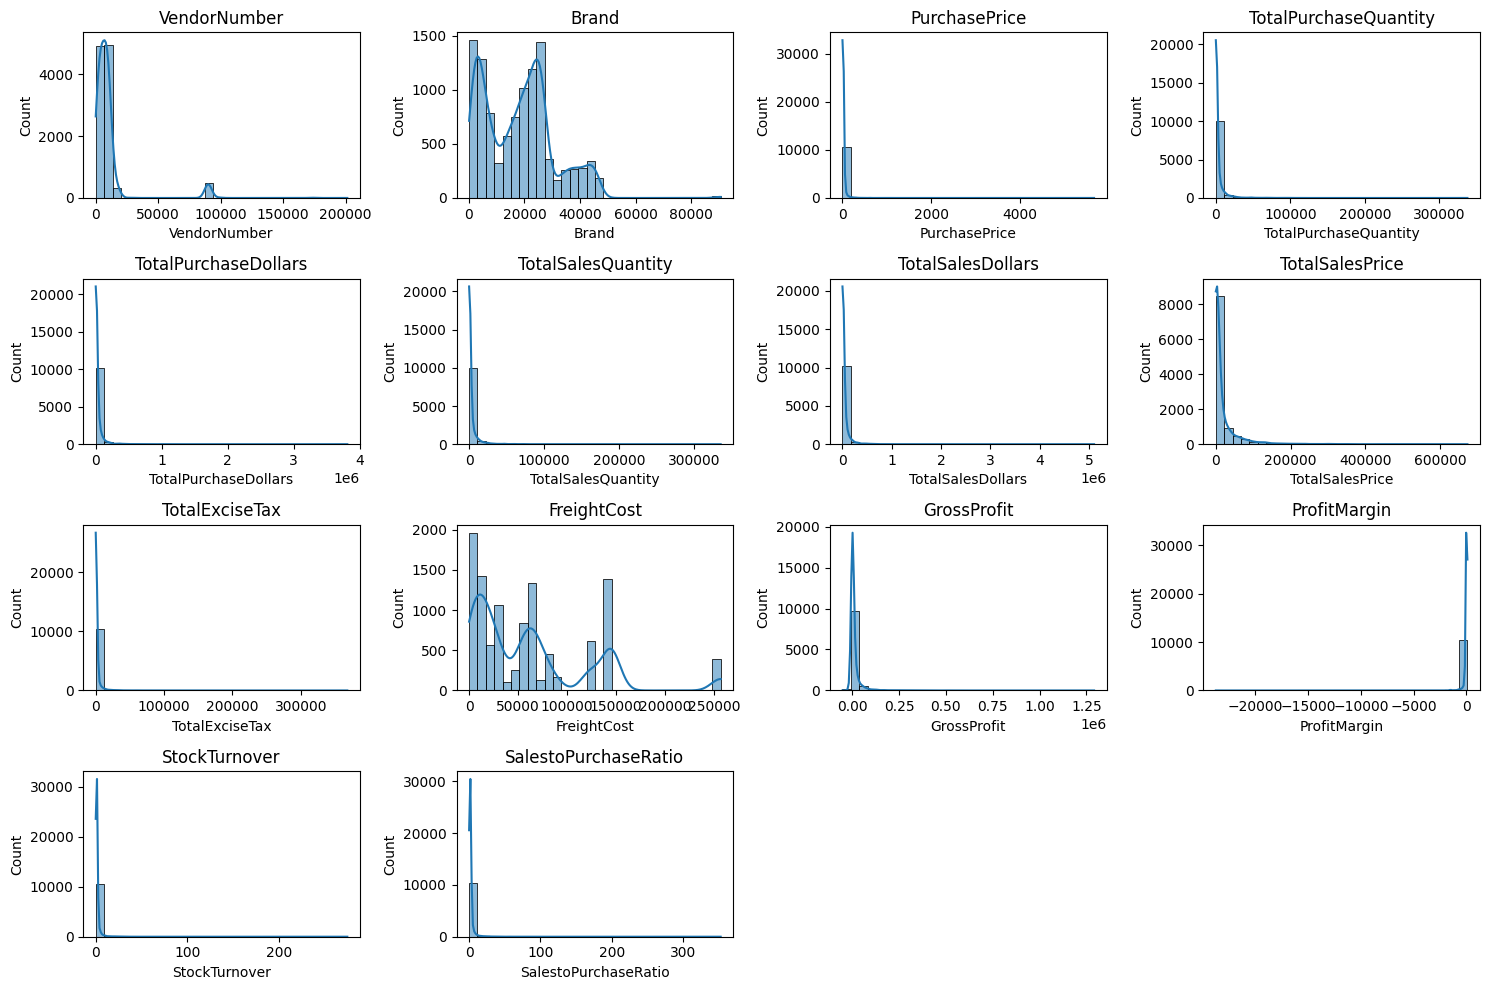

In [6]:
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.histplot(df [col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

Can countplot be helpful ?

In [7]:
# # for outliers 

# numerical_cols = df.select_dtypes(include=np.number).columns
# plt.figure(figsize=(15, 10))
# for i, col in enumerate(numerical_cols):
#     plt.subplot(4, 4, i+1) # Adjust grid layout as needed
#     sns.boxplot(y=df [col])
#     plt.title(col)

# plt.tight_layout()
# plt.show()


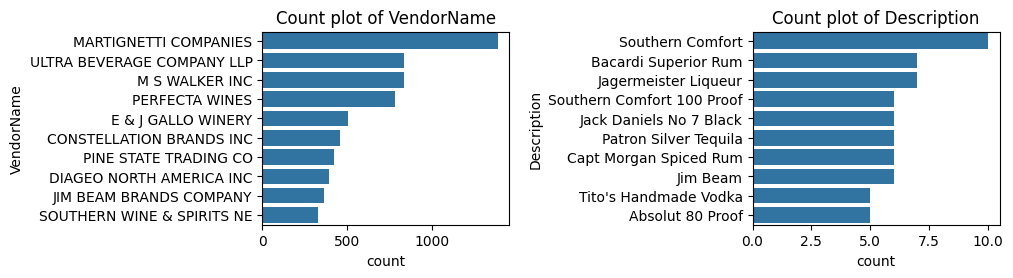

In [8]:
categorical_columns=['VendorName','Description']
plt.figure(figsize=(20,10))
for i , col in enumerate(categorical_columns):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.countplot(y=df [col],order=df[col].value_counts().index[:10])

    plt.title(f"Count plot of {col}")

plt.tight_layout()
plt.show()


Analysis

In [9]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [10]:
brand_performance.columns

Index(['Description', 'TotalSalesDollars', 'ProfitMargin'], dtype='object')

In [11]:
low_sales_threshold = brand_performance[ 'TotalSalesDollars' ] .quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'] .quantile(0.85)

In [12]:
low_sales_threshold

np.float64(286.185)

In [13]:
high_margin_threshold

np.float64(56.198056057839054)

In [14]:
# Filter brands with low sales but high profit
target_brands= brand_performance[
(   brand_performance['TotalSalesDollars']<=low_sales_threshold ) &
(   brand_performance['ProfitMargin'] >= high_margin_threshold  )]
print ("Brands with Low Sales but High Profit Margins:" )
display(target_brands.sort_values('TotalSalesDollars'))


Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
7777,Santa Rita Organic Svgn Bl,9.99,66.466466
2896,Debauchery Pnt Nr,11.58,65.975820
2537,Concannon Glen Ellen Wh Zin,15.95,83.448276
2677,Crown Royal Apple,27.86,89.806174
7818,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
8939,Tommasi Poggio Tufo Cab Svgn,269.73,74.789604
9229,Vigne A Porrona Rosso,272.79,96.825397
3980,Gifft Chardonnay,279.80,94.245890
5736,Mad Dogs & Englishmen Jumil,279.80,97.666190


In [15]:
#brand_performance=brand_performance[brand_performance['TotalSalesDollars']<1000]0

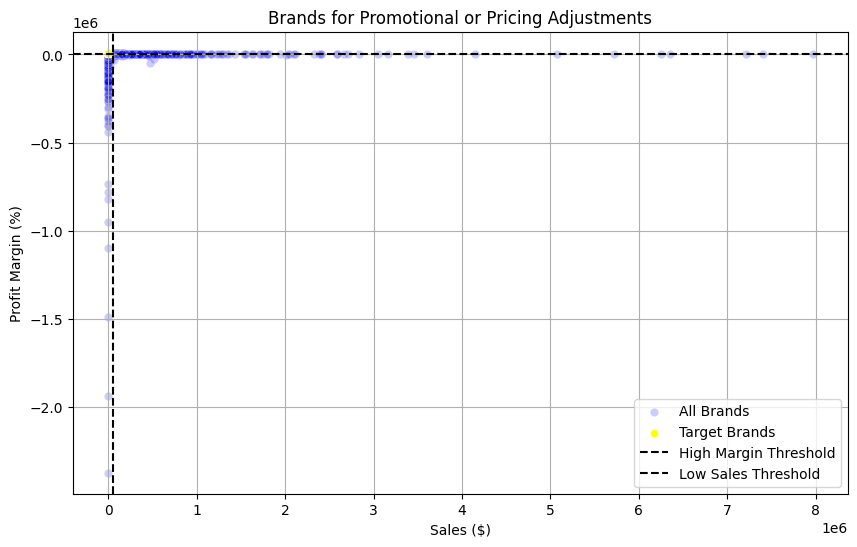

In [16]:

high_margin_threshold = 30
low_sales_threshold = 50000

plt.figure(figsize=(10,6))

brand_performance['ProfitMargin'] = brand_performance['ProfitMargin'] * 100
target_brands['ProfitMargin'] = target_brands['ProfitMargin'] * 100

sns.scatterplot(
    data=brand_performance,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color="blue",
    alpha=0.2,
    label="All Brands"
)

# target brands
sns.scatterplot(
    data=target_brands,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color="yellow",
    label="Target Brands"
)

plt.axhline(
    y=high_margin_threshold,
    linestyle='--',
    color='black',
    label="High Margin Threshold"
)
plt.axvline(
    x=low_sales_threshold,
    linestyle='--',
    color='black',
    label="Low Sales Threshold"
)
plt.xlabel("Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()


VENDORS,BRANDS -> HIGHEST PERFORMANCE

In [17]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [18]:
top_vendors=df.groupby("VendorName")['TotalSalesDollars'].sum().nlargest(10)
top_brands=df.groupby("Description")['TotalSalesDollars'].sum().nlargest(10)
top_vendors_formatted=top_vendors.apply(format_dollars)

top_vendors_df = top_vendors.reset_index()
top_vendors_df['FormattedSales'] = top_vendors_formatted.values

In [23]:
low_vendors = df.groupby("VendorName")['TotalSalesDollars'].sum().nsmallest(10)
low_vendors_formatted = low_vendors.apply(format_dollars)

low_vendors_df = low_vendors.reset_index()
low_vendors_df['FormattedSales'] = low_vendors_formatted.values


In [19]:
top_vendors_df

,VendorName,TotalSalesDollars,FormattedSales
0,DIAGEO NORTH AMERICA INC,68739834.97,68.74M
1,MARTIGNETTI COMPANIES,40960117.82,40.96M
2,PERNOD RICARD USA,32279544.17,32.28M
3,JIM BEAM BRANDS COMPANY,31898621.16,31.90M
4,BACARDI USA INC,25005365.79,25.01M
5,CONSTELLATION BRANDS INC,24467134.23,24.47M
6,E & J GALLO WINERY,18553774.66,18.55M
7,BROWN-FORMAN CORP,18476611.60,18.48M
8,ULTRA BEVERAGE COMPANY LLP,17802646.10,17.80M
9,M S WALKER INC,15436066.26,15.44M


In [25]:
low_vendors_df

,VendorName,TotalSalesDollars,FormattedSales
0,AAPER ALCOHOL & CHEMICAL CO,0.00,0.0
1,LAUREATE IMPORTS CO,0.00,0.0
2,TRUETT HURST,14.99,14.99
3,CAPSTONE INTERNATIONAL,246.87,246.86999999999998
4,FANTASY FINE WINES CORP,327.59,327.59000000000003
5,SILVER MOUNTAIN CIDERS,342.51,342.51
6,UNCORKED,1091.39,1.09K
7,LOYAL DOG WINERY,1111.26,1.11K
8,"IRA GOLDMAN AND WILLIAMS, LLP",1265.58,1.27K
9,FLAVOR ESSENCE INC,1474.41,1.47K


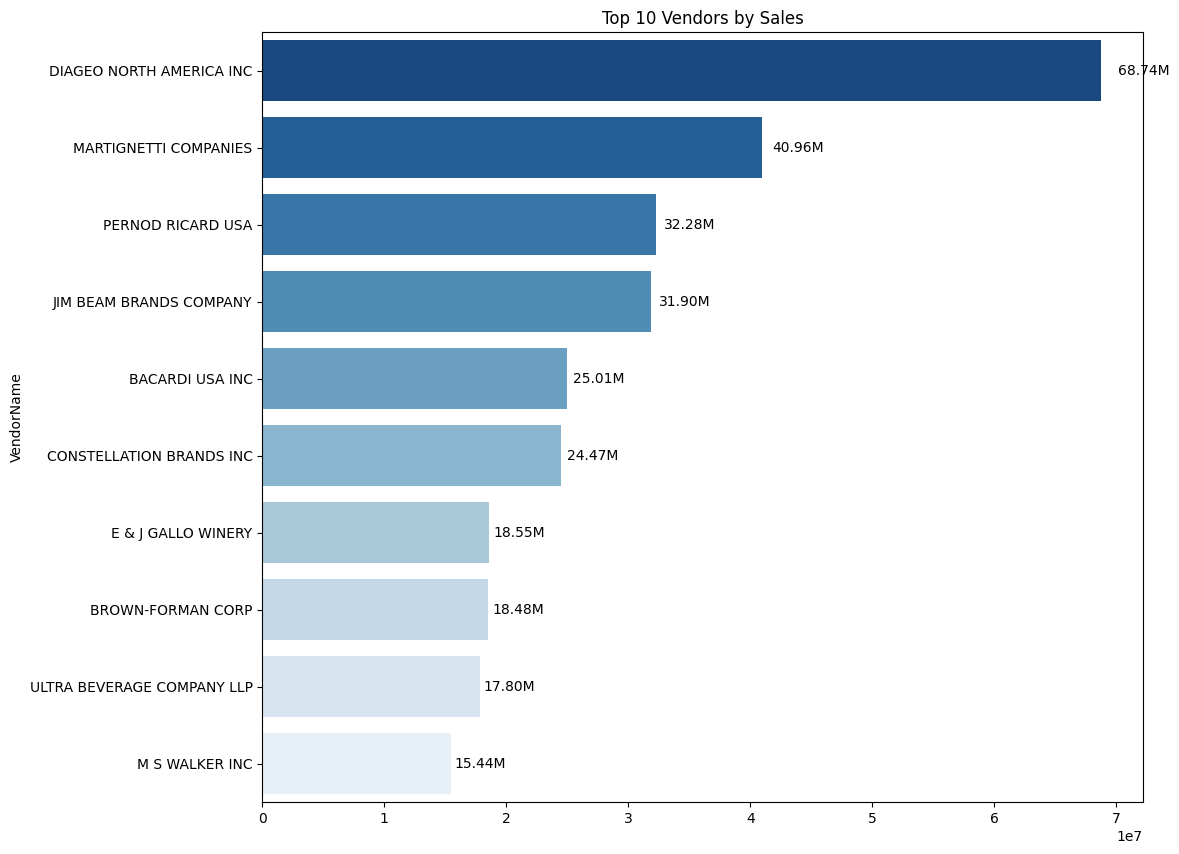

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

## LABELLING 
for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')



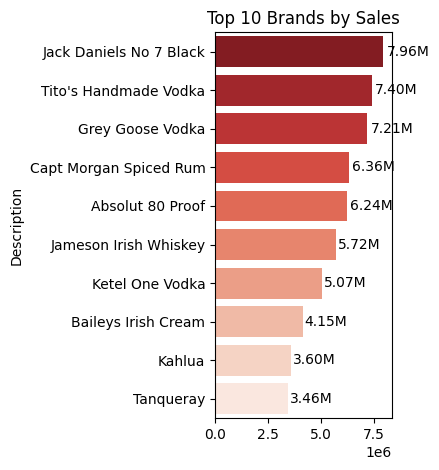

In [21]:
## TOP BRANDS 
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

## LABELLING
for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [ ]:
# # Bottom 10 Vendors by sales
# low_vendors = df.groupby("VendorName")['TotalSalesDollars'].sum().nsmallest(10)
# low_vendors_formatted = low_vendors.apply(format_dollars)

# low_vendors_df = low_vendors.reset_index()
# low_vendors_df['FormattedSales'] = low_vendors_formatted.values


In [44]:
low_vendors = low_vendors.dropna()


In [45]:
# Step 1: Average profit margin per vendor
vendor_sales = df.groupby("VendorName")['ProfitMargin'].mean()

# Step 2: Get top/bottom vendor names
top_vendors_names = vendor_sales.nlargest(10).index
low_vendors_names = vendor_sales.nsmallest(10).index

# Step 3: Pull transaction-level data for those vendors
top_vendors = df[df['VendorName'].isin(top_vendors_names)]['ProfitMargin']
low_vendors = df[df['VendorName'].isin(low_vendors_names)]['ProfitMargin']

In [47]:
low_vendors = df[df['VendorName'].isin(low_vendors_names)]['ProfitMargin'].dropna()
print("Top Vendors count:", len(top_vendors))
print("Low Vendors count:", len(low_vendors))


Top Vendors count: 35
Low Vendors count: 1214


In [48]:
print("Low Vendors Selected:", low_vendors_names)
print(df[df['VendorName'].isin(low_vendors_names)][['VendorName','ProfitMargin']].head(20))


Low Vendors Selected: Index(['AAPER ALCOHOL & CHEMICAL CO', 'ADAMBA IMPORTS INTL INC',
       'BACARDI USA INC', 'BANFI PRODUCTS CORP', 'CAMPARI AMERICA',
       'CONSTELLATION BRANDS INC', 'CRUSH WINES', 'Circa Wines',
       'DELICATO VINEYARDS INC', 'DIAGEO CHATEAU ESTATE WINES'],
      dtype='object', name='VendorName')
                   VendorName  ProfitMargin
5             BACARDI USA INC     27.106980
12            BACARDI USA INC     32.491893
20            BACARDI USA INC     27.339387
21            BACARDI USA INC     24.823107
23            BACARDI USA INC     30.557678
27            BACARDI USA INC     33.232585
31            CAMPARI AMERICA     22.471613
36            BACARDI USA INC     26.866024
45   CONSTELLATION BRANDS INC     20.906844
47   CONSTELLATION BRANDS INC     27.377945
53   CONSTELLATION BRANDS INC     39.750942
80            BACARDI USA INC     27.516838
87   CONSTELLATION BRANDS INC     38.200136
99   CONSTELLATION BRANDS INC     41.097859
108           

In [54]:
print(type(low_vendors))
print(low_vendors.shape)
print(low_vendors.describe())


<class 'pandas.core.series.Series'>
(1214,)
count    1214.000000
mean            -inf
std              NaN
min             -inf
25%        18.293317
50%        32.518830
75%        39.813646
max        98.133133
Name: ProfitMargin, dtype: float64


In [59]:
# Clean profit margins: remove negatives, NaN, inf, and unrealistic >100%
df_clean = df[(df['ProfitMargin'].notna()) & 
              (df['ProfitMargin'] > 0) & 
              (df['ProfitMargin'] <= 100)]

# Now define top_vendors and low_vendors from df_clean
top_vendors = df_clean[df_clean['VendorName'].isin(top_vendors_names)]['ProfitMargin']
low_vendors = df_clean[df_clean['VendorName'].isin(low_vendors_names)]['ProfitMargin']


In [60]:
def confidence_interval(data, confidence=0.95):
    data = np.array(data).astype(float).flatten()   # ensure numeric 1D array
    
    if len(data) == 0:   # safeguard for empty case
        return np.nan, np.nan, np.nan
    
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


# Clean low_vendors and top_vendors before CI
top_vendors = top_vendors.replace([np.inf, -np.inf], np.nan).dropna()
low_vendors = low_vendors.replace([np.inf, -np.inf], np.nan).dropna()

# Now apply CI
top_mean, top_lower, top_upper = confidence_interval(top_vendors.values)
low_mean, low_lower, low_upper = confidence_interval(low_vendors.values)


print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

Top Vendors 95% CI: (58.03, 73.43), Mean: 65.73
Low Vendors 95% CI: (36.15, 38.37), Mean: 37.26


In [61]:
# top_mean, top_lower, top_upper = confidence_interval(top_vendors)
# low_mean, low_lower, low_upper = confidence_interval(low_vendors)


In [62]:
print(f"Top Vendors 95% CI: {top_lower:.2f}, {top_upper:.2f}, Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: {low_lower:.2f}, {low_upper:.2f}, Mean: {low_mean:.2f}")


Top Vendors 95% CI: 58.03, 73.43, Mean: 65.73
Low Vendors 95% CI: 36.15, 38.37, Mean: 37.26


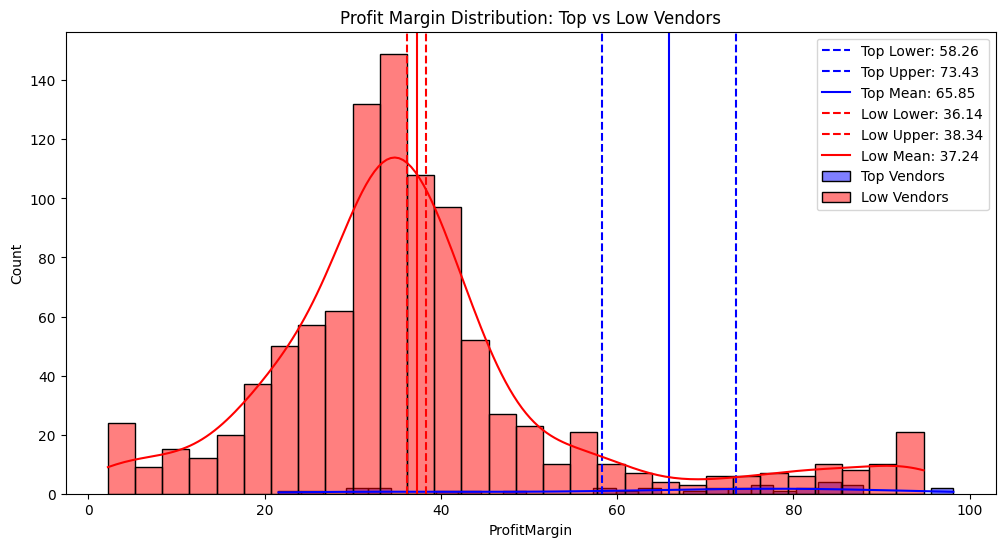

In [66]:
# Replace inf with NaN and drop
top_vendors = top_vendors.replace([np.inf, -np.inf], np.nan).dropna()
low_vendors = low_vendors.replace([np.inf, -np.inf], np.nan).dropna()

# Optional: Winsorize extreme outliers (clip at 1st and 99th percentiles)
low_vendors = low_vendors.clip(lower=low_vendors.quantile(0.01),
                               upper=low_vendors.quantile(0.99))
top_vendors = top_vendors.clip(lower=top_vendors.quantile(0.01),
                               upper=top_vendors.quantile(0.99))

# Recalculate CI
top_mean, top_lower, top_upper = confidence_interval(top_vendors.values)
low_mean, low_lower, low_upper = confidence_interval(low_vendors.values)

# Plot again
plt.figure(figsize=(12,6))

# Top Vendors
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors",multiple="layer")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean,  color="blue", linestyle="-",  label=f"Top Mean: {top_mean:.2f}")

# Low Vendors
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors",multiple="layer")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean,  color="red", linestyle="-",  label=f"Low Mean: {low_mean:.2f}")

plt.legend()
plt.xlabel("ProfitMargin")
plt.ylabel("Count")
plt.title("Profit Margin Distribution: Top vs Low Vendors")
plt.show()
